<Body>   
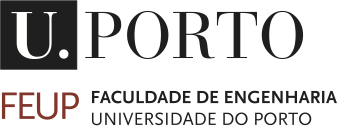   
<h1> <b>Computer Vision 2022/2023 </b> </h1>
<p><b>Andry Maykol Pinto </b> (amgp@fe.up.pt)</p>
<p>Department of Electrical and Computer Engineering</p>
</Body>  
FEUP

---

# **Image Filters**

<h2>Table of contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
<ol>
    <li><a href="#ref1">An introduction to convolution kernels in OpenCV</a></li>
    <li><a href="#ref2">Spatial linear filter: blurring</a></li>
    <li><a href="#ref3">Spatial linear filter: Gaussian blur </a></li>
    <li><a href="#ref4">Spatial non-linear filter: Median blur</a></li>
    <li><a href="#ref5">Spatial non-linear filter: Bilateral filter</a></li>
    <li><a href="#ref6">Similarity metrics</a></li>
    <li><a href="#ref7">Sharpening filter</a></li>
    <li><a href="#ref8">Exploring the Fourier transform</a></li>
    <li><a href="#ref9">Low Pass Filter (LPF)</a></li>
    <li><a href="#ref10">High Pass Filter (HPF)</a></li>
    <li><a href="#ref11">Edge detectors</a></li>
</ol>
<p></p>
</div>
<hr>



<a id="ref1"></a>
# An introduction to convolution kernels in OpenCV

OpenCV provides a function to convolve a kernel with an image, named as `cv2.filter2D()`. It is possible to use 2D-convolution kernels and the OpenCV library to apply different blurring and sharpening techniques to an image.

**Example**:


$$
kernel= \frac{1}{25}
\begin{bmatrix}
     1          & 1    & 1 & 1 & 1      \\
     1          & 1    & 1 & 1 & 1      \\
     1          & 1    & 1 & 1 & 1      \\
     1          & 1    & 1 & 1 & 1      \\
     1          & 1    & 1 & 1 & 1      
\end{bmatrix}
\\
$$ 

Filtering with the above kernel results in the following procedure: for a sliding 5x5 window being centered on each pixel, all pixels falling within this window are summed up and the result is then divided by 25. This division aims to normalize the result, keeping the same range of values. 

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('img_example.jpg')

if img is None:
  print('Could not read image')
 
# define the kernel
b_kernel = np.ones((5,5), np.float32)/25

# converting from BGR to RGB for displaying in plt.
cv2.cvtColor(img, cv2.COLOR_BGR2RGB, img); 

# apply the convolution
dst = cv2.filter2D(src=img, ddepth=-1, kernel=b_kernel)

# displaying original image and final
plt.figure(figsize=(18,19))
plt.subplot(121)
plt.imshow(img)
plt.title('Original')

plt.subplot(122)
plt.imshow(dst)
plt.title('Averaging 5x5')

Images also can be filtered with various low-pass filters (LPF), high-pass filters (HPF).

*   A LPF removes noise, or blurring the image. 
*   A HPF helps in finding edges in an image.

In this context, **frequency refers to the rate of change of pixel values**. Sharp edges would be high frequency content because the pixel values change rapidly in that region.



<a id="ref2"></a>
# Spatial linear filter: blurring

aims to averaging the pixel values within a neighborhood. This is also called a low pass filter. A low pass filter is a filter that allows low frequencies and blocks higher frequencies.  The smoothening effect is controlled by the **size of the kernel**, depending on how much we want to smoothen the image. A bigger size leads to averaging over a larger area. 

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

#load image
img = cv2.imread('img_example.jpg')

# converting from BGR to RGB for displaying in plt.
cv2.cvtColor(img, cv2.COLOR_BGR2RGB, img); 

#define kernel
kernel_3x3 = np.ones((3,3), np.float32) / 9.0
#b_kernel = np.array([[0, 0, 0],
#                   [0, 1, 0],
#                   [0, 0, 0]])

#kernel_5x5 = np.ones((5,5), np.float32) / 25.0
print(kernel_3x3)

# apply kernel
dst = cv2.filter2D(src=img, ddepth=-1, kernel=kernel_3x3)

# displaying original image and final
plt.figure(figsize=(18,19))
plt.subplot(121)
plt.imshow(img)
plt.title('Original')

plt.subplot(122)
plt.imshow(dst)
plt.title('Blurring 3x3')


OpenCV has provided ` blur()` method to blur an image.

The syntax of this function is `dest = blur(source, kernel_size)`

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

#Load image
img = cv2.imread('img_example.jpg')

# converting from BGR to RGB for displaying in plt.
cv2.cvtColor(img, cv2.COLOR_BGR2RGB, img); 

#Blurring
blur = cv2.blur(img,(7,7))

# displaying original image and final
plt.figure(figsize=(18,19))
plt.subplot(121)
plt.imshow(img)
plt.title('Original')

plt.subplot(122)
plt.imshow(blur)
plt.title('Blurring 7x7')

<a id="ref3"></a>
# Spatial linear filter: Gaussian blur

In this type, the image is blurred and the contrast it reduced.

The syntax of this function is
`dst	=	cv2.GaussianBlur(src, kernel_size, sigmaX, sigmaY)`

The final two arguments are sigmaX and sigmaY, meaning the Gaussian kernel standard deviations, in the X (horizontal) and Y (vertical) direction. The default setting of sigmaY is zero. If you simply  set sigmaX to zero, then the standard deviations are computed from the kernel size (width and height respectively). 
Gaussian filtering is highly effective in removing Gaussian noise from the image.

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

#Load image
img = cv2.imread('img_example.jpg')

# converting from BGR to RGB for displaying in plt.
cv2.cvtColor(img, cv2.COLOR_BGR2RGB, img); 

#Gaussian blur
blur = cv2.GaussianBlur(src=img,ksize=(5,5),sigmaX=0)

plt.figure(figsize=(18,19))
plt.subplot(121)
plt.imshow(img)
plt.title('Original')

plt.subplot(122)
plt.imshow(blur)
plt.title('Gaussian blur 5x5')

<a id="ref4"></a>
# Spatial non-linear filter: Median blur

It's a non-linear filter since the central element of an image is replaced by median of all pixels.

The syntax of this function is `dest = cv2.medianBlur(src, kernel_size)`.

This is highly effective in removing salt-and-pepper noise. One interesting thing to note is that, in the Gaussian and box filters, the filtered value for the central element can be a value which may not exist in the original image. However this is not the case in median filtering, since the central element is always replaced by some pixel value in the image.

The kernel size must be **a positive odd integer**.

In [ ]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt

def noisy_sp(image):
      row,col,ch = image.shape
      s_vs_p = 0.5
      amount = 0.15
      out = np.copy(image)
      # Salt mode
      num_salt = np.ceil(amount * image.size * s_vs_p)
      coords = [np.random.randint(0, i - 1, int(num_salt))
              for i in image.shape]
      out[coords] = 1

      # Pepper mode
      num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
      coords = [np.random.randint(0, i - 1, int(num_pepper))
              for i in image.shape]
      out[coords] = 0
      return out

#Load image
img = cv2.imread('img_example.jpg')

# converting from BGR to RGB for displaying in plt.
cv2.cvtColor(img, cv2.COLOR_BGR2RGB, img); 

# Add S%P noise
img_noisy = noisy_sp(img)

#Median blur
median = cv2.medianBlur(src=img_noisy, ksize=5)

# Plotting
plt.figure(figsize=(18,19))
plt.subplot(121)
plt.imshow(img_noisy)
plt.title('Original')

plt.subplot(122)
plt.imshow(median)
plt.title('Median blur')

> *Discuss this outcome.*

<a id="ref5"></a>
# Spatial non-linear filter: Bilateral filter


The bilateral filter `cv2.bilateralFilter()` is highly effective at noise removal while preserving edges. The operation is slower compared to other filters. The last two arguments here specify the color and space neighborhood. 

The bilateral filter also uses a Gaussian filter in the space domain, but it also uses one more (multiplicative) Gaussian filter component which is a function of pixel intensity differences. 

The bilateral filter performs the averaging only at pixels that are similar to each other in intensity. It also takes a color neighborhood metric to see if it can replace the current pixel that is similar in intensity as well.


In [ ]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt

def noisy_gauss(image, mean=0, var=0.001):
    image = np.array(image/255, dtype=float)
    noise = np.random.normal(mean, var ** 0.5, image.shape)
    out = image + noise
    if out.min() < 0:
        low_clip = -1.
    else:
        low_clip = 0.
    out = np.clip(out, low_clip, 1.0)
    out = np.uint8(out*255)
    return out


#Load image
img = cv2.imread('img_example.jpg')

# converting from BGR to RGB for displaying in plt.
cv2.cvtColor(img, cv2.COLOR_BGR2RGB, img); 

# Add S&P noise
img_noisy = noisy_sp(img)

#Bilateral filtering
bf = cv2.bilateralFilter(src=img_noisy,d=11,sigmaColor=175,sigmaSpace=175)

# Plotting
plt.figure(figsize=(18,19))
plt.subplot(121)
plt.imshow(img_noisy)
plt.title('Original')

plt.subplot(122)
plt.imshow(bf)
plt.title('Bilateral filtering')

Change the parameters of the filter.

> *Discuss the outcomes.*

<a id="ref6"></a>
# Similarity metrics

The similarity metrics will quantify the degree of visual and semantic similarity of a pair of images. In other words, they compare two images and return a value that tells you how visually similar they are. There multiple similarity measures (proposed by researchers), namely:
1. Mean Squared Error (MSE)
2. Root Mean Squared Error (RMSE)
3. Peak Signal-to-Noise Ratio (PSNR)
4. Structural Similarity Index (SSIM)
5. Universal Quality Image Index (UQI)
6. Multi-scale Structural Similarity Index (MS-SSIM)
7. Erreur Relative Globale Adimensionnelle de Synthèse (ERGAS)
8. Spatial Correlation Coefficient (SCC)
9. Relative Average Spectral Error (RASE)
10. Spectral Angle Mapper (SAM)
11. Visual Information Fidelity (VIF)


The MSE, RMSE, <a href="https://ieeexplore.ieee.org/abstract/document/1284395/" class="cw kn" target="_blank" rel="noopener ugc nofollow">PSNR</a> and the <a href="https://ieeexplore.ieee.org/abstract/document/1284395/" class="cw kn" target="_blank" rel="noopener ugc nofollow">SSIM</a> are the most frequently used. 

There is a library in python called **sewar** that implements some similarity measures. This library is not installed in colaboratory by default and so, we need to do it.

```
!pip install sewar
```

----
**Exercise 1:** 

Measure the impact of the Average, Gaussian, Median and Bilateral filters for image corrupted by Gaussian and salt-and-pepper noise.

a) Load the image "img_example.jpg" and show two images corrupted with  salt-and-pepper and gaussian noise (mean = 0, variance = 0.01), respectively.

b) Determine the PSNR and SSIM for each noisy image, considering the original one. 

c) Apply the Average (3x3), Gaussian (3x3), Median(3x3) and Bilateral (d=3) filters to each noisy image.

d) Determine the PSNR and SSIM for the result of each filter, in respect to the original image.

e) Repeate points 2 to 4 for kernels with different sizes: 3x3, 5x5, 7x7 and 11x11. Show a graphical representation for the PSNR and SSIM for different kernels. 
> application notes: see https://matplotlib.org/stable/tutorials/introductory/sample_plots.html


In [ ]:
!pip install sewar

Solution a).

In [ ]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
from sewar.full_ref import mse, rmse, psnr, uqi, ssim, ergas, scc, rase, sam, msssim, vifp

#def noisy_gauss... TODO
#def noisy_sp...  TODO

#Load image
img = cv2.imread('img_example.jpg')

# converting from BGR to RGB for displaying in plt.
cv2.cvtColor(img, cv2.COLOR_BGR2RGB, img); 

## TODO
#print("PSNR: ", psnr(blur, org))
#print("SSIM: ", ssim(blur, org))

SSIM:  (1.0, 1.0)


Solution b)

In [ ]:
#TODO

Solution c)

In [ ]:
#TODO

Solution d)

In [ ]:
#TODO


_________


<a id="ref7"></a>
# Sharpening filter

A sharpening filter will sharpen the edges (high frequency components) in the image.

**Example:**

$$
kernel= 
\begin{bmatrix}
     -1          & -1    & -1       \\
     -1          & 8     & -1       \\
     -1          & -1    & -1         
\end{bmatrix}
\\
$$ 



In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

#Load image
img = cv2.imread('img_example.jpg')

# converting from BGR to RGB for displaying in plt.
cv2.cvtColor(img, cv2.COLOR_BGR2RGB, img); 

#Define HF kernels
kernel_sharpen_1 = np.array([[0,-1,0],
                             [-1, 4,-1], 
                             [0,-1,0]])

kernel_sharpen_2 = np.array([[-1,-1,-1],
                             [-1, 8,-1], 
                             [-1,-1,-1]])


kernel_sharpen_3 = np.array([[-1,-1,-1,-1,-1], 
                             [-1,-2,-2,-2,-1],
                             [-1,-2, 32,-2,-1],
                             [-1,-2,-2,-2,-1],
                             [-1,-1,-1,-1,-1]])

# Applying different kernels to the input
output_1 = cv2.filter2D(img, -1, kernel_sharpen_1)
output_2 = cv2.filter2D(img, -1, kernel_sharpen_2)
output_3 = cv2.filter2D(img, -1, kernel_sharpen_3)

#Plots
plt.figure(figsize=(18,19))
plt.subplot(121)
plt.imshow(img)
plt.title('Original')

plt.subplot(122)
plt.imshow(output_1)
plt.title('HFC (-1, 4, -1)')

plt.figure(figsize=(18,19))
plt.subplot(121)
plt.imshow(img)
plt.title('Original')

plt.subplot(122)
plt.imshow(output_2)
plt.title('HFC (-1, 8, -1)')



plt.figure(figsize=(18,19))
plt.subplot(121)
plt.imshow(img)
plt.title('Original')

plt.subplot(122)
plt.imshow(output_3)
plt.title('HFC (-1,-2, 32,-2,-1)')


Let's add the high frequency components:

In [ ]:
hfc_1 = img + output_1
hfc_2 = img + output_2
hfc_3 = img + output_3

#Plots
plt.figure(figsize=(18,19))
plt.subplot(121)
plt.imshow(img)
plt.title('Original')

plt.subplot(122)
plt.imshow(hfc_1)
plt.title('Sharpen (-1, 4, -1)')


plt.figure(figsize=(18,19))
plt.subplot(121)
plt.imshow(img)
plt.title('Original')

plt.subplot(122)
plt.imshow(hfc_2)
plt.title('Sharpen (-1, 8, -1)')


plt.figure(figsize=(18,19))
plt.subplot(121)
plt.imshow(img)
plt.title('Original')

plt.subplot(122)
plt.imshow(hfc_3)
plt.title('Sharpen (-1,-2, 32,-2,-1)')


> *Discuss this outcome.*

____________

<a id="ref8"></a>
# Exploring the Fourier transform

This concept is useful when manipulating images because it allows us to identify regions in images where a signal (such as the values of image pixels) changes a lot, and also regions where the change is less dramatic.

The waveforms you observe all around you are the sum of other waveforms. 

The **magnitude spectrum** of an image is another image that provides a representation of the original image in terms of its changes.

This forms the foundation of the aforementioned processing operations: HPFs and LPFs.


*   `cv2.dft()` performs a forward or inverse Discrete Fourier transform of a 1D  or 2D floating-point array
*    `cv2.idft()` calculates the inverse Discrete Fourier Transform of a 1D or 2D array.







In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

#Load image
img = cv2.imread('img_example.jpg', cv2.IMREAD_GRAYSCALE)

# converting from BGR to RGB for displaying in plt.
cv2.cvtColor(img, cv2.COLOR_BGR2RGB, img); 

# Convert to  floating
img_float32 = np.float32(img)

# Foward FT (the result, though being a complex array, has complex-conjugate symmetry)
dft = cv2.dft(img_float32, flags = cv2.DFT_COMPLEX_OUTPUT) 

#Shift the zero-frequency component to the center of the spectrum.
dft_shift = np.fft.fftshift(dft)

# Determine the magnitude spectrum.
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

# Plot
plt.figure(figsize=(18,19))
plt.subplot(121)
plt.imshow(img, cmap = 'gray')
plt.title('Original')

plt.subplot(122)
plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum')
	

<a id="ref9"></a>
## Low Pass Filter (LPF)

Create a mask with high value (1) at low frequencies and 0 at HF region.

In [ ]:
rows, cols = img.shape
crow, ccol = int(rows/2) , int(cols/2)     # center

# create a mask first, center square is 1, remaining all zeros
mask = np.zeros((rows, cols, 2), np.uint8) 
# mask.shape is (rows, cols, 2) which matches the returned np.ndarray from cv2.dft().

mask[crow-30 : crow+30, ccol-30 : ccol+30] = 1  


# apply mask and inverse DFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0], img_back[:,:,1])


#Plot
plt.figure(figsize=(18,19))
plt.subplot(121)
plt.imshow(img, cmap = 'gray')
plt.title('Original')

plt.subplot(122)
plt.imshow(img_back, cmap = 'gray')
plt.title('Magnitude Spectrum')
plt.show()     



<a id="ref10"></a>
## High Pass Filter (HPF)

----
**Exercise 2:** 

Implement a HPF using the Fourier Transform based on the example above.

In [ ]:
#TODO

> *Discuss this outcome: the difference between LPF and HPF*

------------------

<a id="ref11"></a>
# Edge detectors

It is used to identify the boundaries (edges) of objects or regions within an image. Edges are characterized by sudden changes in pixel intensity and so, the there is a need to analyse the neighboring pixels.

In computer vision, the most well known edge detectors are:

*   Sobel Edge Detection
*   Canny Edge Detection



The Sobel Operators are the following:


$$
Sobel_X = 
\begin{bmatrix}
     -1          & 0    & 1       \\
     -2          & 0    & 2       \\
     -1          & 0    & 1         
\end{bmatrix}
\\
$$ 

$$
Sobel_Y = 
\begin{bmatrix}
     1         & 2    & 1       \\
     0         & 0     & 0       \\
     -1        & -2    & -1         
\end{bmatrix}
\\
$$ 


In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

#Load image
img = cv2.imread('img_example.jpg')

# converting from BGR to RGB for displaying in plt.
cv2.cvtColor(img, cv2.COLOR_BGR2RGB, img); 

# Convert to graycsale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Blur the image for better edge detection
img_blur = cv2.GaussianBlur(img_gray, (3,3), 0) 

# Sobel Edge Detection
sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) # Sobel Edge Detection on the X axis
sobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) # Sobel Edge Detection on the Y axis
sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) # Combined X and Y Sobel Edge Detection


# Display Sobel Edge Detection Images
plt.figure(figsize=(18,19))
plt.subplot(221)
plt.imshow(img)
plt.title('Original')

plt.subplot(222)
plt.imshow(sobelx, cmap = 'gray')
plt.title('Sobel X')

plt.subplot(223)
plt.imshow(sobely, cmap = 'gray')
plt.title('Sobel Y')

plt.subplot(224)
plt.imshow(sobelxy, cmap = 'gray')
plt.title('Sobel XY')
plt.show()    

----
**Exercise 3:** 

Use the Canny Edge detector to obtain a binary image capturing the contours.

This detector is formed by 4 steps:
1. Noise Reduction
2. Calculating Intensity Gradient of the Image
3. Suppression of False Edges
4. Hysteresis Thresholding

> application notes: search for Canny Edge detector. See the https://docs.opencv.org/4.5.3/da/d5c/tutorial_canny_detector.html to be inspired. 
> application notes: search for Otsu’s Binarization (`cv2.threshold`)


In [ ]:
#TODO

______________________________

# References
Learning OpenCV 4 Computer Vision with Python 3, 3rd edition, Joseph and Joe, Packt